# Figure 4

In [2]:
# Section 1: Import Libraries
import numpy as np  # numerical arrays and math
import matplotlib.pyplot as plt  # plotting
from scipy.optimize import curve_fit  # curve fitting
import itertools  # misc iteration helpers (optional)
import matplotlib.patches as mpatches  # shapes/annotation utilities (optional)
import os  # filesystem paths

In [3]:
# Section 2: Load Contact Probability and ReeSq Datasets
contact_prob1_data = {}
reesq1_data = {}
n_overlapping_self_replicas1_data = {}
contacts1_data = {}
# Check the files that are present in the folders "contact_probability_4a", "reesq_4a_inset" and "inter_chain_contacts_overlapping_chains_4b", read them and save them in dictionaries
if os.path.isdir("contact_probability_4a"):
    print("Directory exists")
    folders = [f for f in os.listdir("contact_probability_4a")]
else:
    folders = []

for x in folders:
    y=x.strip('contact_probability_').strip('linear.dat').split('_')
    L=y[0].split('x')[0]
    n=y[1]
    contact_prob1_data[L,n] = np.loadtxt("contact_probability_4a/" + x)

if os.path.isdir("reesq_4a_inset"):
    print("Directory exists")
    folders = [f for f in os.listdir("reesq_4a_inset")]
else:
    folders = []

for x in folders:
    y=x.strip('reesq_').strip('linear.dat').split('_')
    L=y[0].split('x')[0]
    n=y[1]
    reesq1_data[L,n] = np.loadtxt("reesq_4a_inset/" + x)
if os.path.isdir("inter_chain_contacts_overlapping_chains_4b"):
    print("Directory exists")
    folders = [f for f in os.listdir("inter_chain_contacts_overlapping_chains_4b")]
else:
    folders = []

for x in folders:
    y=x.strip('intra_inter_chain_contacts_').strip('linear_monodisperse.dat').split('_')
    L=y[0].split('x')[0]
    n=y[1]
    data = np.loadtxt("inter_chain_contacts_overlapping_chains_4b/" + x)
    n_overlapping_self_replicas1_data[L,n] = data[:, [0,2]]
    contacts1_data[L,n] = data[:, [0,1]]

Directory exists
Directory exists
Directory exists


In [ ]:
# Section 3: Define Symbol
symbols = ['o', 's', '^', 'D', 'v']  # ordered symbols


In [6]:
def power_law(x, a, b):
    return a * x**b  # a*N^b

def linear_law(x, m, c):
    return m * x + c  # simple linear utility

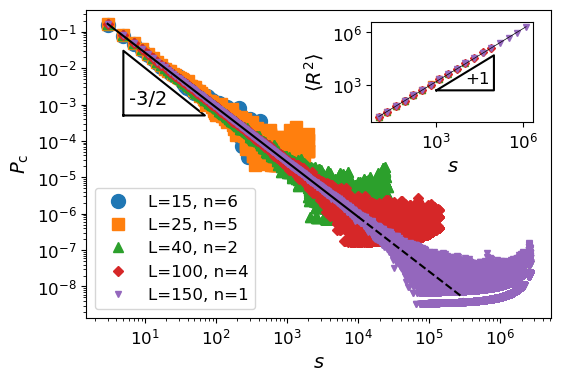

In [26]:
# Section 4: Plot Contact Probability vs Sequence Separation with Inset for Pc(s) and <Ree^2>
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot contact probability data only for available folders, sorted by L
sorted_keys = sorted(contact_prob1_data.keys(), key=lambda x: int(x[0]))
i=10
j=0
for key in sorted_keys:
    ax1.plot(contact_prob1_data[key][:,0], contact_prob1_data[key][:,1], symbols[j], markersize=i, label="L="+str(key[0])+", n="+str(key[1])+"", zorder=-i)
    j+=1
    i-=1.5

last_index = np.where(contact_prob1_data[sorted_keys[-1]][:,0] <= 1e4)[0][-1]
params, covariance = curve_fit(linear_law, np.log(contact_prob1_data[sorted_keys[-1]][:last_index,0]), np.log(contact_prob1_data[sorted_keys[-1]][:last_index,1]), absolute_sigma=False)
x_fit = np.linspace(3, 1e4, 10000)
ax1.plot(x_fit, np.exp(linear_law(np.log(x_fit), *params)), 'k')
# \;\alpha=1.505 \pm 0.003
x_fit2 = np.linspace(1e4, 3e5, 10000)
ax1.plot(x_fit2, np.exp(linear_law(np.log(x_fit2), *params)), '--k')

ax1.plot([5, 70, 5, 5], [5*10**-4, 5*10**-4, 3e-2, 5*10**-4], '-', color='k', zorder=-10)
ax1.text(6, 1*10**-3, "-3/2", fontsize=14)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel(r'$s$', fontsize=14)
ax1.set_ylabel(r'$P_{\rm c}$', fontsize=14)
ax1.legend(fontsize=12, loc="lower left")

# Create an inset axis for the reesq1 data
ax2 = fig.add_axes([0.6, 0.6, 0.27, 0.25]) # [x, y, width, height] in figure coordinates

i=6
j=0
sorted_keys = sorted(reesq1_data.keys(), key=lambda x: int(x[0]))
for key in sorted_keys:
    ax2.errorbar(reesq1_data[key][:,0], reesq1_data[key][:,1], yerr=reesq1_data[key][:,2], fmt=symbols[j], markersize=4, zorder=-i, linestyle='None')
    j+=1
    i-=0.5

# Fit using the first three available reesq datasets when possible
available_reesq = sorted(reesq1_data.keys(), key=lambda x: int(x[0]))

x = reesq1_data[available_reesq[-1]][:,0]
y = reesq1_data[available_reesq[-1]][:,1]

params, covariance = curve_fit(linear_law, np.log(x), np.log(y), absolute_sigma=False)

ax2.plot(x, np.exp(linear_law(np.log(x), *params)), 'k', linewidth=0.5)
ax2.plot([10**3, 10**5,10**5, 10**3], [0.5*10**3, 0.5*10**3, 0.5*10**5, 0.5*10**3], '-', color='k', zorder=-10)
ax2.text(10**4, 1.2*10**3, r"+1", fontsize=12)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel(r'$s$', fontsize=14)
ax2.set_ylabel(r'$\langle R^2\rangle$', fontsize=14)
plt.savefig("Contact_probability_seqsep_and_Ree_seqsep.pdf", dpi=300, bbox_inches='tight')
plt.show()

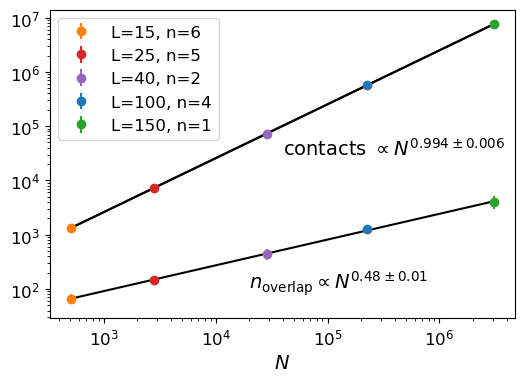

In [31]:
# Section 6: Fit Power Laws for Overlaps and Contacts and Plot on Log-Log Axes
plt.figure(figsize=(6,4))
sorted_keys_overlap = sorted(n_overlapping_self_replicas1_data.keys(), key=lambda x: int(x[0]))
sorted_keys_contacts = sorted(contacts1_data.keys(), key=lambda x: int(x[0]))
# Get unique L values for coloring
unique_L = sorted(set(key[0] for key in sorted_keys_overlap))
color_by_L = {L: ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'][i] for i, L in enumerate(unique_L)}


i=2
overlap_xfit = []
overlap_yfit = []
overlap_yfit_err = []

contact_xfit = []
contact_yfit = []
contact_yfit_err = []
for key in sorted_keys_overlap:
    color = color_by_L.get(key[0], 'tab:blue')
    plt.errorbar(np.mean(n_overlapping_self_replicas1_data[key][:,0]), np.mean(contacts1_data[key][:,1]), yerr=np.std(contacts1_data[key][:,1]), fmt='o', markersize=6, linestyle='None', color=color, label="L="+str(key[0])+", n="+str(key[1]))
    plt.errorbar(np.mean(n_overlapping_self_replicas1_data[key][:,0]), np.mean(n_overlapping_self_replicas1_data[key][:,1]), yerr=np.std(n_overlapping_self_replicas1_data[key][:,1]), fmt='o', markersize=6, linestyle='None', color=color)
    
    overlap_xfit.append(np.mean(n_overlapping_self_replicas1_data[key][:,0]))
    overlap_yfit.append(np.mean(n_overlapping_self_replicas1_data[key][:,1]))
    overlap_yfit_err.append(np.std(n_overlapping_self_replicas1_data[key][:,1])) 

    contact_xfit.append(np.mean(contacts1_data[key][:,0]))
    contact_yfit.append(np.mean(contacts1_data[key][:,1]))
    contact_yfit_err.append(np.std(contacts1_data[key][:,1]))


overlap_xfit = np.array(overlap_xfit)
overlap_yfit = np.array(overlap_yfit)
overlap_yfit_err = np.array(overlap_yfit_err)
contact_xfit = np.array(contact_xfit)
contact_yfit = np.array(contact_yfit)
contact_yfit_err = np.array(contact_yfit_err)
# Fit power law for overlaps
params, covariance = curve_fit(linear_law, np.log(overlap_xfit), np.log(overlap_yfit), absolute_sigma=False)
x_fit = np.linspace(min(overlap_xfit), max(overlap_xfit), 100)
y_fit = np.exp(linear_law(np.log(x_fit),*params))
plt.plot(x_fit, y_fit, 'k', zorder=-10)

params, covariance = curve_fit(linear_law, np.log(contact_xfit), np.log(contact_yfit), absolute_sigma=False)

x_fit = np.linspace(min(contact_xfit), max(contact_xfit), 100)
y_fit = np.exp(linear_law(np.log(x_fit), *params))
plt.plot(x_fit, y_fit, 'k', zorder=-10)

plt.plot(x_fit, y_fit, 'k', zorder=-10)
plt.text(2e4, 1e2, r"$n_{\rm overlap} \propto N^{0.48 \pm 0.01}$", color='k', fontsize=14)
plt.text(4e4, 3e4, r"contacts $\propto N^{0.994 \pm 0.006}$", color='k', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=14)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("Contacts_and_noverlaps.pdf", dpi=300, bbox_inches='tight')
plt.show()